In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df.duplicated().sum()

125

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(12205, 18)

In [12]:
df['Month'].value_counts()


May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

In [13]:
dic = {'Feb':2, 'Mar':3, 'Apr': 4, 'May':5, 'June':6,
       'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
       'Nov': 11, 'Dec': 12}

df["Month"].replace(dic, inplace=True)

In [14]:
df[['VisitorType', 'Weekend', 'Revenue']][:110]

,VisitorType,Weekend,Revenue
0,Returning_Visitor,False,False
1,Returning_Visitor,False,False
2,Returning_Visitor,False,False
3,Returning_Visitor,False,False
4,Returning_Visitor,True,False
...,...,...,...
105,Returning_Visitor,False,False
106,Returning_Visitor,False,False
107,Returning_Visitor,False,False
108,Returning_Visitor,False,False


In [17]:
categorical_list = ['VisitorType', 'Weekend', 'Revenue']

In [18]:
for var in categorical_list:
    print('='*(len(var)))
    print(var)
    print('='*(len(var)))
    print(df[var].value_counts())

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64
Weekend
False    9346
True     2859
Name: Weekend, dtype: int64
Revenue
False    10297
True      1908
Name: Revenue, dtype: int64


In [20]:
# VisitorType can take 3 values. Weekend and Revenue (target) 2 binary values (True/False).
# Replace binary categorical values:
binary_list = ['Weekend', 'Revenue']

for column in binary_list:
    df.loc[df[column] == True, column] = 1
    df.loc[df[column] == False, column] = 0
    df[column] = df[column].astype(int)

# Rename Revenue column name as target:
df = df.rename(columns = {'Revenue' : 'target'})

In [21]:
# Variable VisitorType takes most of values as 'Returning_Visitor', therefore 1 are asigned to 'Returning_Visitor' class and 0 to the rest.

df.loc[df['VisitorType'] != 'Returning_Visitor', 'VisitorType'] = 0
df.loc[df['VisitorType'] == 'Returning_Visitor', 'VisitorType'] = 1
df['VisitorType'] = df['VisitorType'].astype(int)

In [22]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,target
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [23]:
X = df.drop('target', axis=1)
Y = df['target']
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,target
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


Text(0.5, 1.0, 'Representation of customers that bought an item')

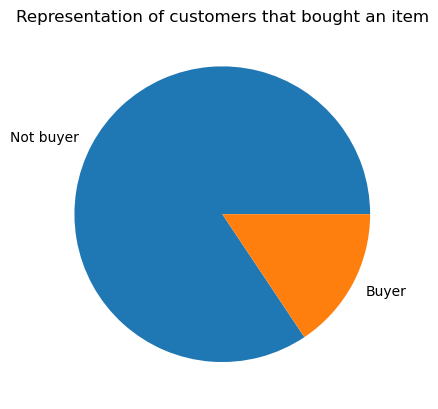

In [24]:
plt.pie(Y.value_counts(), labels=['Not buyer','Buyer'])
plt.title('Representation of customers that bought an item')

In [25]:
# Describe the numerical variables of the dataset
df.describe()
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int32
target                       int32
dtype: object

In [26]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,target
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,0.094423,-0.006586,-0.025622,-0.007262,-0.034643,-0.020859,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,0.056250,-0.007529,-0.015742,-0.006729,-0.014991,-0.021201,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,0.062173,-0.009721,-0.038787,-0.030317,-0.035197,0.058771,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,0.043552,-0.009734,-0.019573,-0.027891,-0.025126,0.046354,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.154323,0.004194,-0.013586,-0.040108,-0.044223,0.131420,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.135882,0.002870,-0.007724,-0.034869,-0.037390,0.122881,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,-0.054076,0.026811,-0.015501,0.002787,0.089184,0.128156,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,-0.086049,0.016345,-0.003323,-0.000987,0.087478,0.171942,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.066244,0.018632,0.045908,0.010588,0.012286,-0.115154,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,-0.259992,0.012806,0.003528,-0.016450,0.052856,0.088122,-0.017723,-0.083601


In [27]:
X_normalized = (X-X.mean())/X.std()


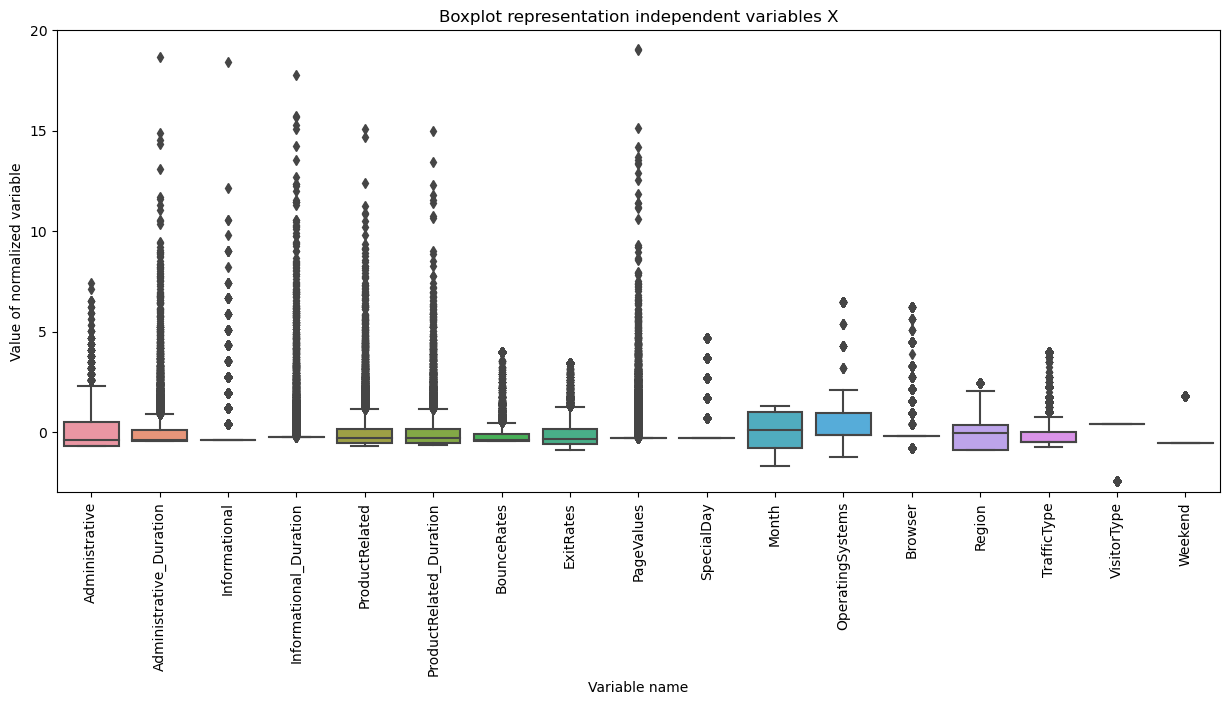

In [28]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(data= X_normalized)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(ylim=(-3, 20))
plt.title(u'Boxplot representation independent variables X')
plt.ylabel('Value of normalized variable')
_ = plt.xlabel('Variable name')

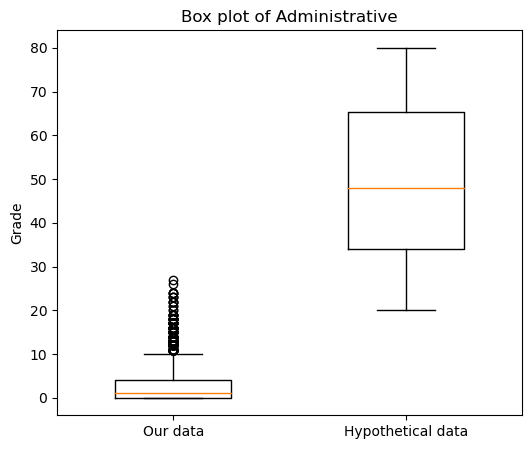

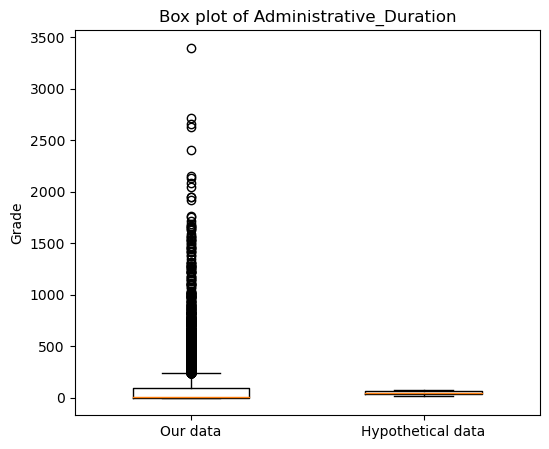

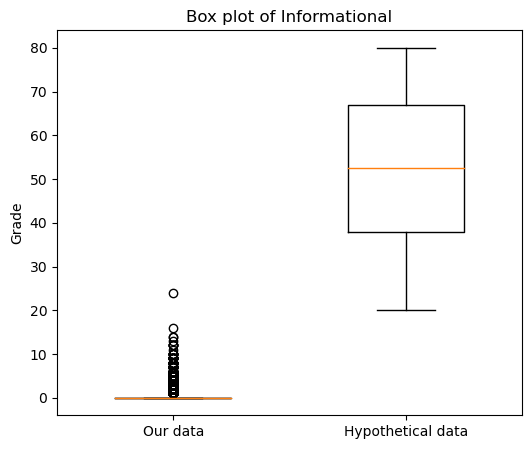

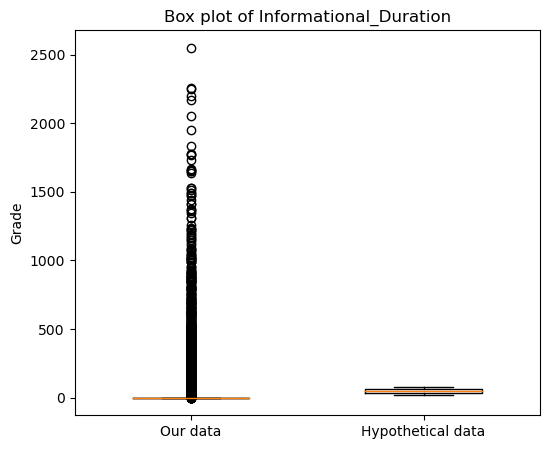

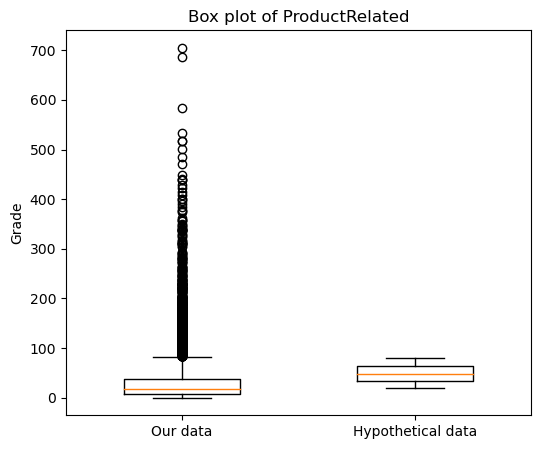

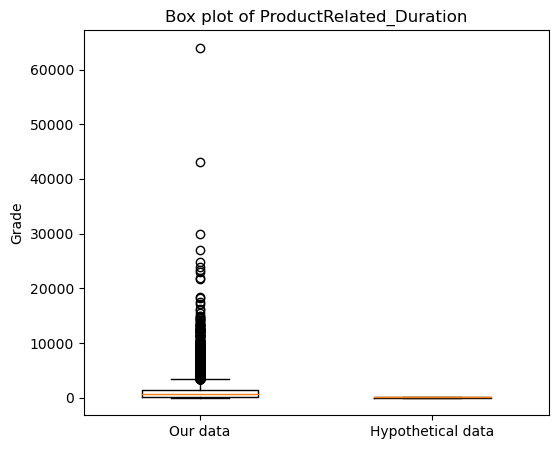

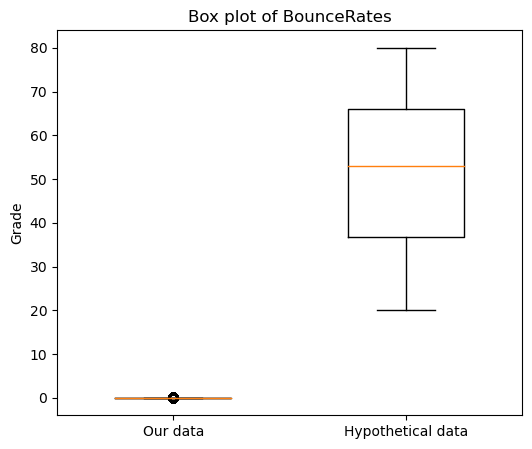

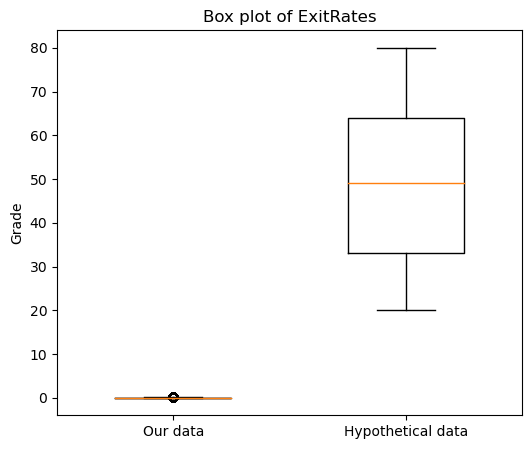

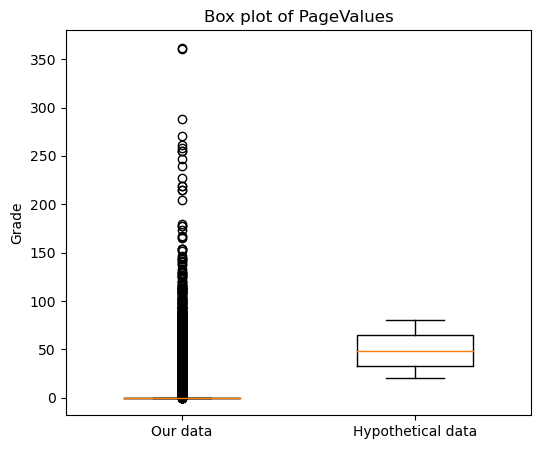

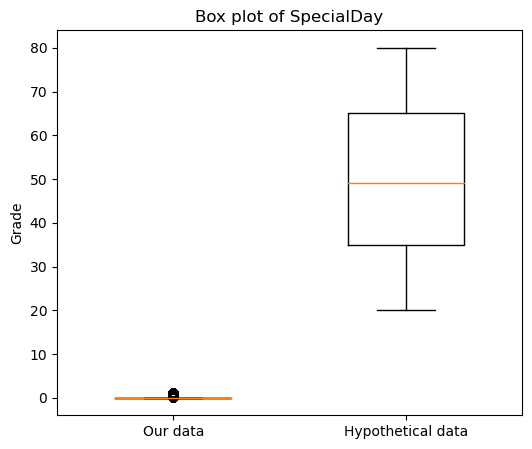

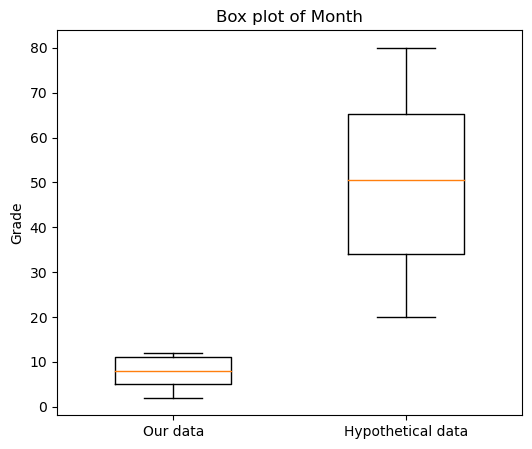

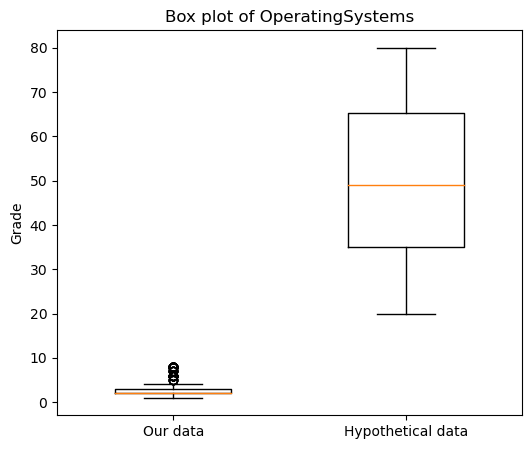

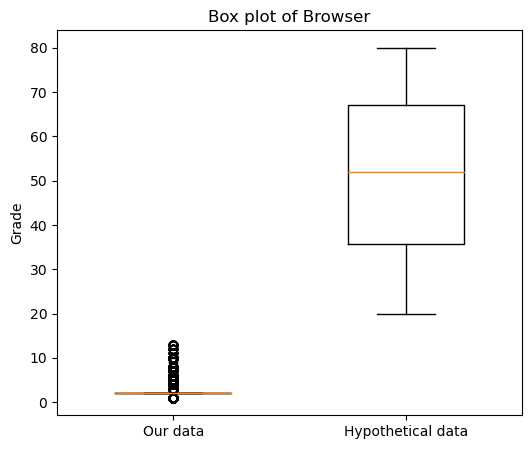

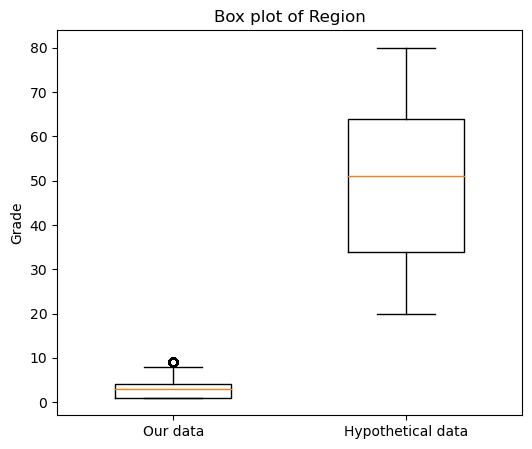

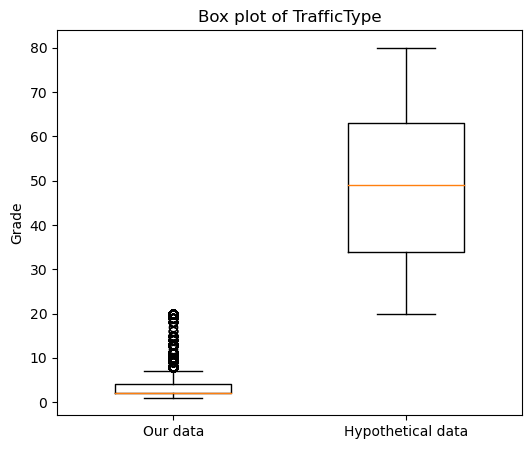

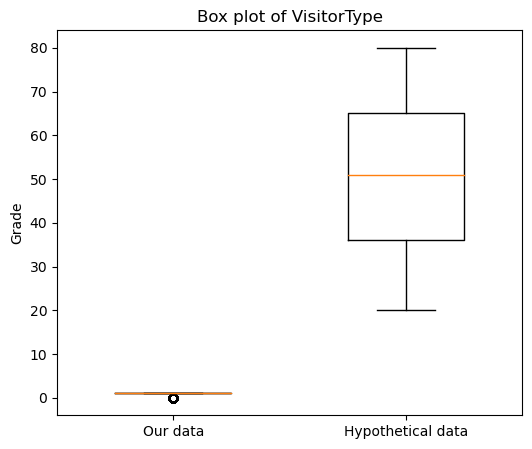

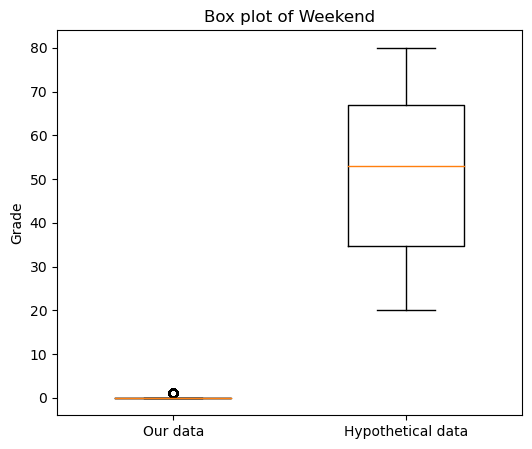

In [29]:
Q1 = np.percentile(X , 25)
Q3 = np.percentile(X , 75)

# 2.
Q1,Q3 = np.percentile(X , [25,75])

# Find IQR, upper limit, lower limit
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

# Find outliers
outliers = X[(X > ul) | (X < ll)]

# Box plot
variable_list = X.columns
for variable in variable_list:
    fig = plt.figure(figsize=(6,5))
    hypo = np.random.randint(20, 81, size=500)
    plt.boxplot([X[variable], hypo], widths=0.5)
    plt.xticks([1,2],['Our data', 'Hypothetical data'])
    plt.ylabel('Grade')
    plt.title(u'Box plot of {}'.format(variable))
    plt.show()

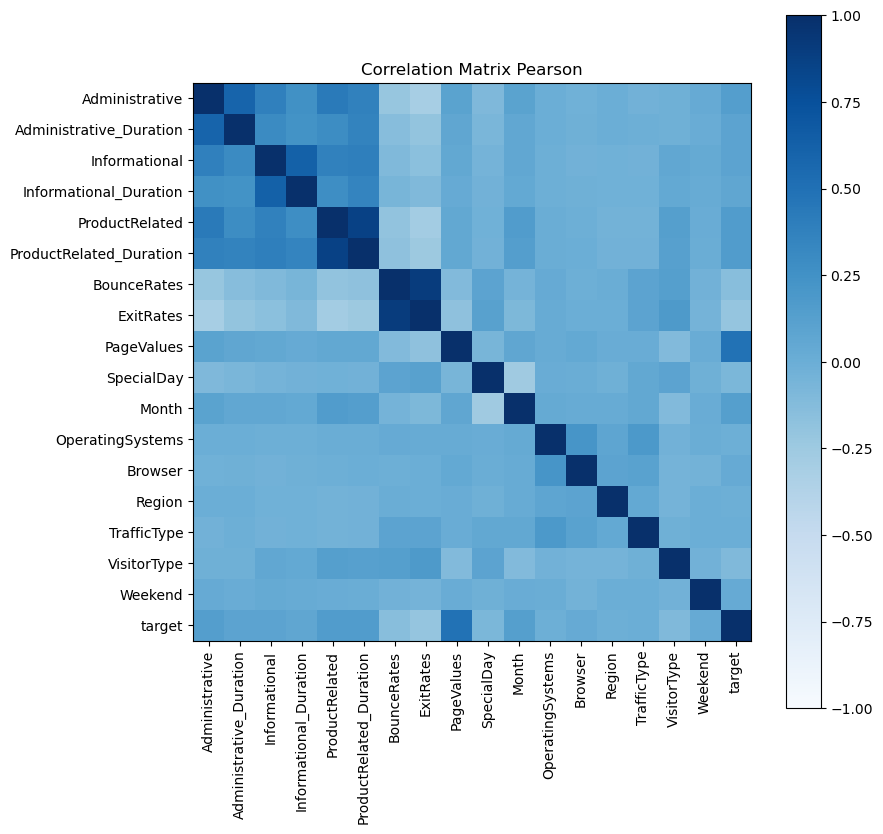

In [31]:
corr_matrix = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(corr_matrix, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Correlation Matrix Pearson')

In [32]:
# Translate colorful correlation matrix into numbers
corr_target = corr_matrix.values [-1,:-1]
reversed_indexs =  abs(corr_target[ : ]).argsort()[ : : -1]
dict = {}
for name, corr in zip( X.columns[reversed_indexs], list(corr_target[reversed_indexs] ) ):
    dict[name] = corr
pd.DataFrame.from_dict(dict, orient='index', columns=['Target correlation'])

,Target correlation
PageValues,0.491894
ExitRates,-0.204320
ProductRelated,0.156042
ProductRelated_Duration,0.150077
BounceRates,-0.145091
Administrative,0.136330
Month,0.126412
VisitorType,-0.102847
Informational,0.093626
Administrative_Duration,0.091768


In [34]:
from sklearn.preprocessing import StandardScaler
standar = StandardScaler()
X_standar = standar.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_standar, Y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# We pass 9 different values of C. GridSearch will determinate which is the best one, and also we pass balanced weight.
params = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

In [39]:
# Try every C value and class weight using GridSearch:
from sklearn.model_selection import GridSearchCV
gs_model = GridSearchCV(model, param_grid=params,
                         cv = 5, scoring='roc_auc')
# Pass the train data to our GridSearch model
gs_model.fit(X_train, Y_train)

# Print the best parameters that are used to optimize the model
print(gs_model.best_params_, "\nROC_AUC: {}".format(round(gs_model.best_score_, 2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC_AUC: 0.9


C:\Users\user1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\user1\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user1\anaconda3\lib\site

In [40]:
log_reg =  LogisticRegression(C=gs_model.best_params_['C'],
                              class_weight=gs_model.best_params_['class_weight'])


In [43]:
log_reg.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

In [44]:
print(log_reg.score(X_test, Y_test))

0.8648095043015158


In [45]:
print(log_reg.score(X_train, Y_train))

0.8695206882425236
